# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

## **为了使项目展示不过于冗长,数据集已经是评估和清洗好了的数据集**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cleaned_house_price=pd.read_csv("house_price.csv")
cleaned_house_price['mainroad'] = cleaned_house_price['mainroad'].astype("category")
cleaned_house_price['guestroom'] = cleaned_house_price['guestroom'].astype("category")
cleaned_house_price['basement'] = cleaned_house_price['basement'].astype("category")
cleaned_house_price['hotwaterheating'] = cleaned_house_price['hotwaterheating'].astype("category")
cleaned_house_price['airconditioning'] = cleaned_house_price['airconditioning'].astype("category")
cleaned_house_price['prefarea'] = cleaned_house_price['prefarea'].astype("category")
cleaned_house_price['furnishingstatus'] = cleaned_house_price['furnishingstatus'].astype("category")

In [2]:
cleaned_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


## **评估和清洗数据的操作可以看我之前上传的项目,我们直接开始下一步操作**

## **探索数据**

在着手推断统计学分析之前,我们可以先借助数据可视化,探索数值变量的分布,以及与房价存在相关性的变量,为后续的进一步分析提供方向

In [3]:
#设置色盘颜色为"pastel"
sns.set_palette("pastel")

### **房价分布**

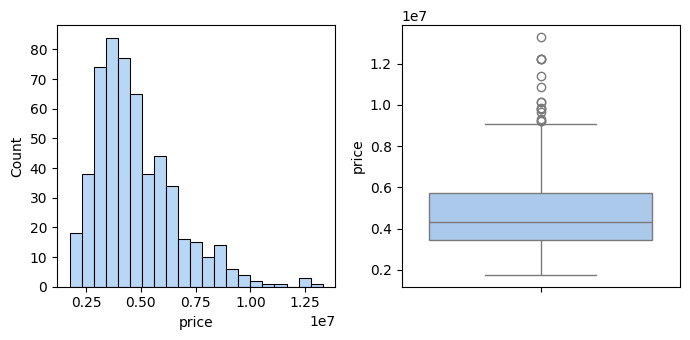

In [4]:
plt.rcParams["figure.figsize"]=[7.00,3.50]
#设置默认画布大小(宽×高,单位英寸)
plt.rcParams["figure.autolayout"]=True
#开启后自动计算并调整图表内所有元素(子图、标题、坐标轴标签、图例、颜色条等)的位置和间距,避免元素重叠、被画布边缘裁剪,或子图之间挤在一起,无需手动调整边距/间距
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_house_price,x="price",ax=axes[0])
sns.boxplot(cleaned_house_price,y="price",ax=axes[1])
plt.show()

房价呈右偏态分布,说明数据集中的大多数房子价格中等,但有一些价格很高的极端值,使得均值被拉高

### **面积分布**

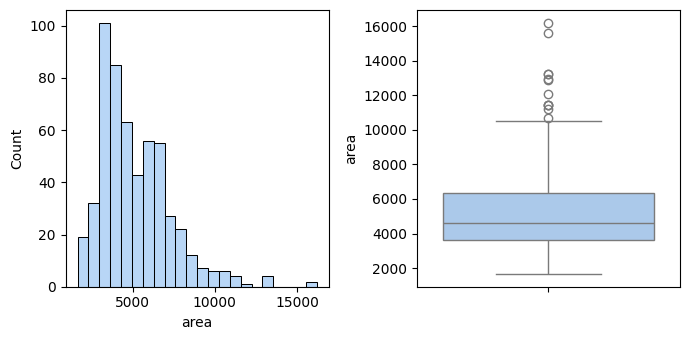

In [5]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_house_price,x="area",ax=axes[0])
sns.boxplot(cleaned_house_price,y="area",ax=axes[1])
plt.show()

面积的分布与房价相似,也呈右偏态分布

### **房价与面积的关系**

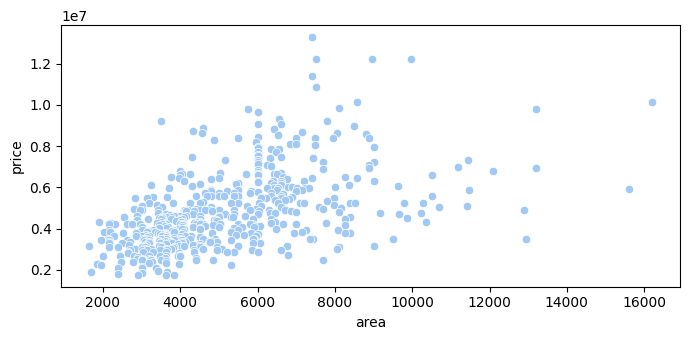

In [6]:
sns.scatterplot(cleaned_house_price,x="area",y="price")
plt.show()

从散点图来看,能大致看出一些正相关关系,但关系的强度需要后续通过计算相关性来得到

### **卧室数与房价**

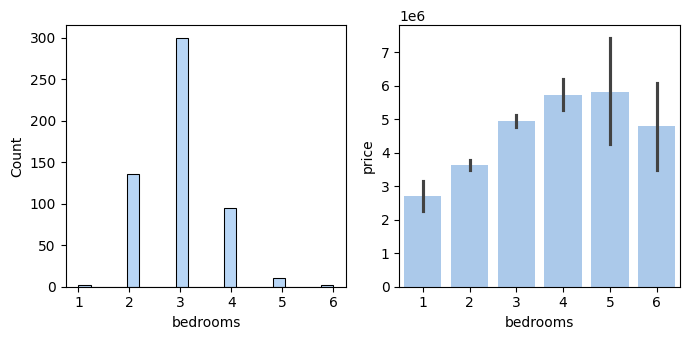

In [7]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_house_price,x="bedrooms",ax=axes[0])
sns.barplot(cleaned_house_price,x="bedrooms",y="price",ax=axes[1],legend=False)
plt.show()

此数据集中房子的卧室数范围为1-6个,其中大多房子有2-4个

从平均房价与卧室数之间的柱状图来看,当卧室数小于5个时,卧室数多的房子价格也相应高,但一旦多于5个,房价并不一定相应更高

### **洗手间数与房价**

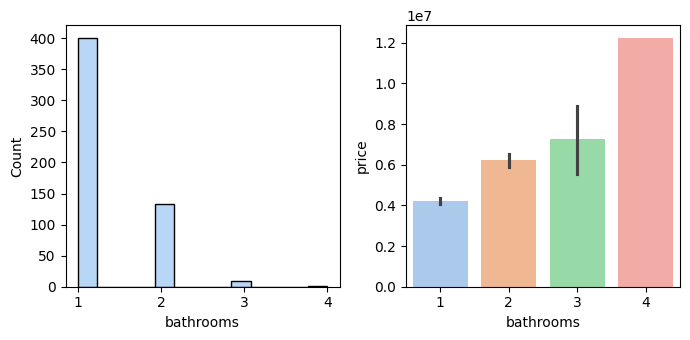

In [8]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_house_price,x="bathrooms",ax=axes[0])
sns.barplot(cleaned_house_price,x="bathrooms",y="price",ax=axes[1],hue="bathrooms",legend=False,palette="pastel")
plt.show()

数据集中房子洗手间数量最少1个,最多4个,其中为1个的数量最多

从平均房价与洗手间数之间的柱状图来看,洗手间多的房子价格也相应高

### **楼层数与房价**

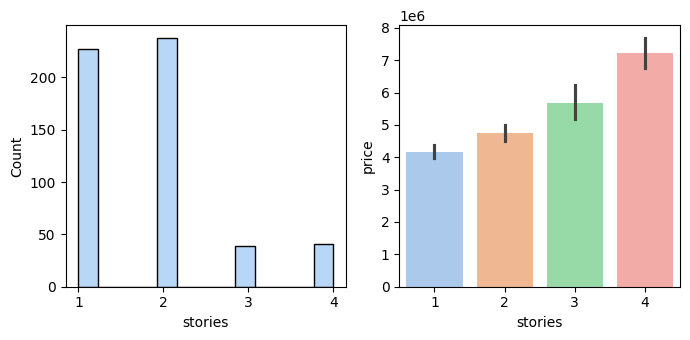

In [9]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_house_price,x="stories",ax=axes[0])
sns.barplot(cleaned_house_price,x="stories",y="price",ax=axes[1],hue="stories",legend=False,palette="pastel")
plt.show()

此数据集中房子的楼层数范围为1-4层,其中大多房子有1层或2层

从平均房价与楼层数之间的柱状图来看,楼层多的房子价格也相应高

### **车库数与房价**

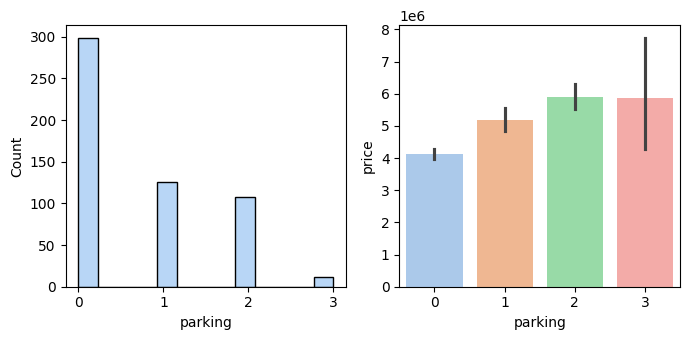

In [10]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_house_price,x="parking",ax=axes[0])
sns.barplot(cleaned_house_price,x="parking",y="price",ax=axes[1],hue="parking",legend=False,palette="pastel")
plt.show()

此数据集中房子的车库数范围为0-3个,不带车库的房子数量是最多的,其次是1个和2个

从平均房价与楼层数之间的柱状图来看,车库多的房子价格也相应高,但超过2个后,房价并不一定相应更高

### **是否在主路与房价**

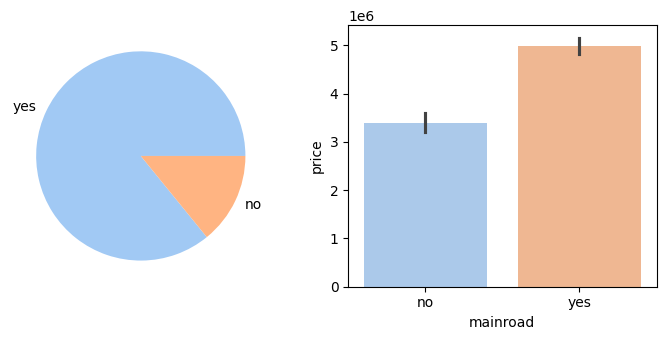

In [11]:
figure,axes=plt.subplots(1,2)
mainroad_count=cleaned_house_price["mainroad"].value_counts()
mainroad_label=mainroad_count.index
axes[0].pie(mainroad_count,labels=mainroad_label)
sns.barplot(cleaned_house_price,x="mainroad",y="price",ax=axes[1],hue="mainroad")
plt.show()

此数据集中房子大多数位于主路

从平均房价与楼层数之间的柱状图来看,在主路的的房子价格也相应高

### **是否有客人房与房价**

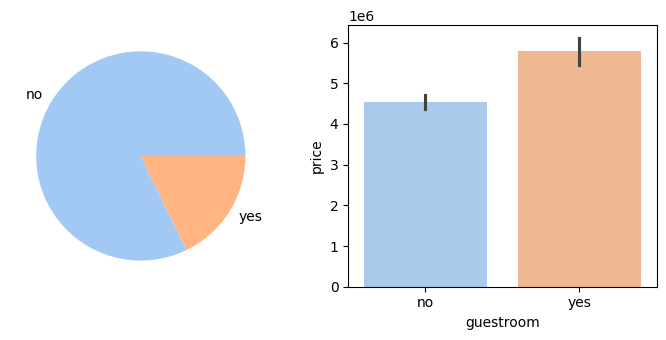

In [12]:
figure,axes=plt.subplots(1,2)
guestroom_count=cleaned_house_price["guestroom"].value_counts()
guestroom_label=guestroom_count.index
axes[0].pie(guestroom_count,labels=guestroom_label)
sns.barplot(cleaned_house_price,x="guestroom",y="price",ax=axes[1],hue="guestroom")
plt.show()

此数据集中房子大部分没有客人房

从平均房价与楼层数之间的柱状图来看,有客人房的的房子价格也相应高

### **是否有地下室与房价**

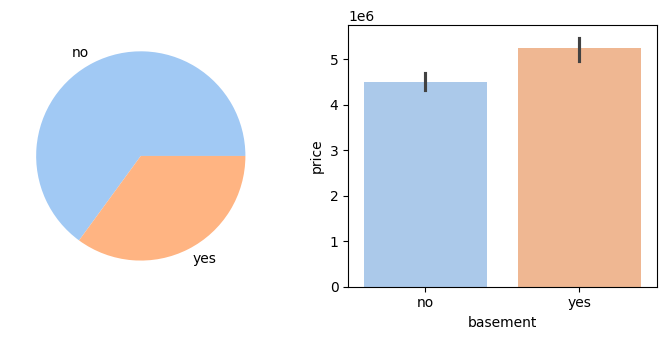

In [13]:
figure,axes=plt.subplots(1,2)
basement_count=cleaned_house_price["basement"].value_counts()
basement_label=basement_count.index
axes[0].pie(basement_count,labels=basement_label)
sns.barplot(cleaned_house_price,x="basement",y="price",ax=axes[1],hue="basement")
plt.show()

此数据集中更多的房子没有地下室

从平均房价与地下室之间的柱状图来看,有地下室的的房子价格也相应高

### **是否有热水器与房价**

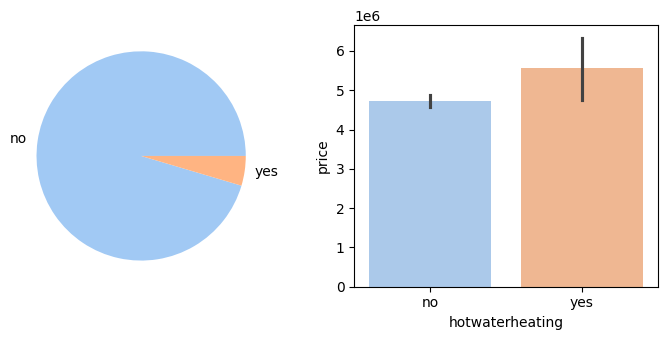

In [14]:
figure,axes=plt.subplots(1,2)
hotwaterheating_count=cleaned_house_price["hotwaterheating"].value_counts()
hotwaterheating_label=hotwaterheating_count.index
axes[0].pie(hotwaterheating_count,labels=hotwaterheating_label)
sns.barplot(cleaned_house_price,x="hotwaterheating",y="price",ax=axes[1],hue="hotwaterheating")
plt.show()

此数据集中房子绝大部分没有热水器

从平均房价与热水器之间的柱状图来看,有热水器的的房子价格也相应高

### **是否有空调与房价**

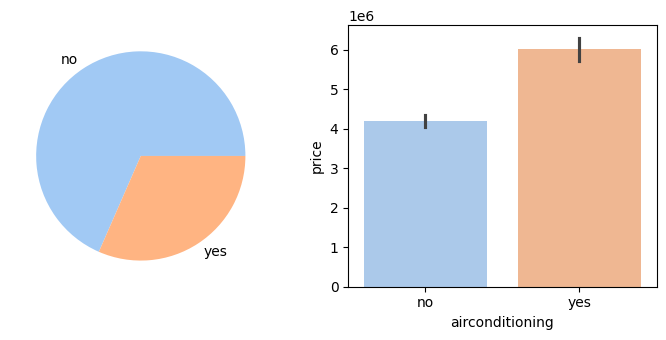

In [15]:
figure,axes=plt.subplots(1,2)
airconditioning_count=cleaned_house_price["airconditioning"].value_counts()
airconditioning_label=airconditioning_count.index
axes[0].pie(airconditioning_count,labels=airconditioning_label)
sns.barplot(cleaned_house_price,x="airconditioning",y="price",ax=axes[1],hue="airconditioning")
plt.show()

此数据集中更多的房子没有空调

从平均房价与空调之间的柱状图来看,有空调的的房子价格也相应高

### **是否位于城市首选社区与房价**

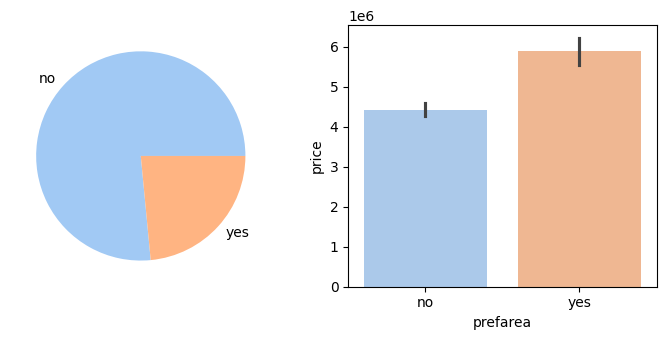

In [16]:
figure,axes=plt.subplots(1,2)
prefarea_count=cleaned_house_price["prefarea"].value_counts()
prefarea_label=prefarea_count.index
axes[0].pie(prefarea_count,labels=prefarea_label)
sns.barplot(cleaned_house_price,x="prefarea",y="price",ax=axes[1],hue="prefarea")
plt.show()

此数据集中大部分房子不在城市首选社区

从平均房价与城市首选社区之间的柱状图来看,在城市首选社区的的房子价格也相应高

### **装修状态与房价**

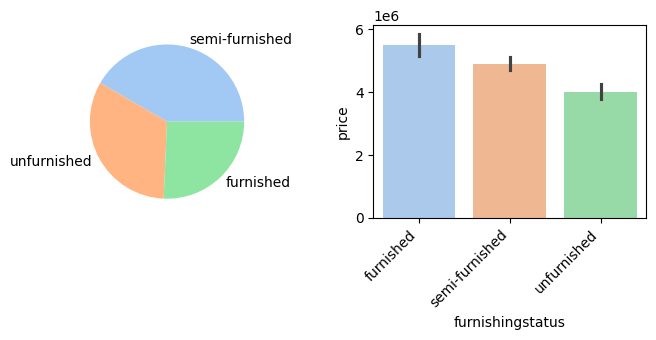

In [17]:
figure,axes=plt.subplots(1,2)
furnishingstatus_count=cleaned_house_price["furnishingstatus"].value_counts()
furnishingstatus_label=furnishingstatus_count.index
axes[0].pie(furnishingstatus_count,labels=furnishingstatus_label)
sns.barplot(cleaned_house_price,x="furnishingstatus",y="price",ax=axes[1],hue="furnishingstatus")
axes[1].tick_params(axis="x",rotation=45)
#把图表x轴的标签与横轴调整为45度
plt.xticks(ha="right")
#令图表x轴的标签右端对准条形中心
plt.show()

此数据集中简装和毛坯的房子较多,1/4左右房子为精装

从平均房价与装修状态之间的柱状图来看,精装的房子价格高于简装,简装高于毛坯

## **分析数据**

在分析步骤中,我们将利用`cleaned_house_price`的数据,进行线性回归分析,目标是得到一个可以根据房屋各个属性对价格进行预测的数学模型

我们先引入做线性回归所需的模块

In [18]:
import statsmodels.api as sm

然后可以创建一个新的DataFrame`lr_house_price`,让它作为我们进行线性回归分析所用的数据

和`cleaned_house_price`区分开的原因是,我们在进行回归分析前,还可能需要对数据进行一些准备,比如引入虚拟变量,这些都可以在`lr_house_price`上执行

In [19]:
lr_house_price=cleaned_house_price.copy()

由于数据里存在分类变量,无法直接建立线性回归模型。我们需要引入虚拟变量,也就是用0和1分别表示是否属于该分类

In [20]:
lr_house_price=pd.get_dummies(lr_house_price,drop_first=True,columns=["mainroad","guestroom",
                                                      "basement","hotwaterheating",
                                                      "airconditioning","prefarea",
                                                      "furnishingstatus"],dtype=int)
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


接下来,我们要把因变量和自变量划分出来

因变量是`price`变量,因为我们进行线性回归的目的,是得到一个能根据其它可能对房屋价格有影响的变量,来预测销售价格的模型

In [21]:
y=lr_house_price["price"]

我们可以把除价格之外的都纳入自变量,但需要查看它们之间的相关性。如果其中有些变量之间相关性很高,会导致共线性

In [22]:
x=lr_house_price.drop("price",axis=1)

In [23]:
x.corr().abs()>0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


从以上输出来看,不同变量之间相关系数的绝对值均小于或等于0.8

接下来,给模型的线性方程添加截距

In [24]:
x=sm.add_constant(x)
x

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


下一步就可以调用OLS函数,利用最小二乘法来得到线性回归模型的参数值

In [25]:
model=sm.OLS(y,x).fit()

为了查看模型结果,我们使用`summary`方法来获得总结信息

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Fri, 12 Dec 2025   Prob (F-statistic):          9.07e-123
Time:                        18:39:21   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

当我们把显著区间设定为0.05时,以上结果的P值可以看出,模型认为以下因素对房屋价格没有显著性影响:卧室数、是否为简装房。此外,常数(表示线性方程的截距)的P值也很大,说明也没有显著影响

可以把这些变量移除后,再次建立线性回归模型

In [27]:
x=x.drop(["const","bedrooms","furnishingstatus_semi-furnished"],axis=1)

In [28]:
model=sm.OLS(y,x).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Fri, 12 Dec 2025   Prob (F-statistic):                        0.00
Time:                        18:39:21   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

可以看到,当我们把P值较大的自变量从线性回归模型中移除后,R方的值从0.682增长到了0.957,提高了模型对现有数据的拟合度

根据各个自变量在线性回归方程中的系数来看,模型预测以下因素的增加(或存在)会显著增加房屋价格:房屋面积、厕所数、楼层数、车库容量、位于主路、有客房、有地下室、有热水器、有空调、位于城市首选社区

线性回归模型预测以下因素的增加(或存在)会显著降低房屋价格:房屋未经装修,为毛坯房

In [30]:
# 要预测房价的房屋的信息：
# 面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修

In [31]:
price_to_predict=pd.DataFrame({"area":[5600],"bedrooms":[4],"bathrooms":[2],
                              "stories":[2],"mainroad":["no"],"guestroom":["no"],
                              "basement":["yes"],"hotwaterheating":["yes"],
                              "airconditioning":["no"],"parking":[2],"prefarea":["yes"],
                              "furnishingstatus":["semi-furnished"]})
price_to_predict

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5600,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


我们需要把分类变量的类型转换为Category,并且通过`categories`参数,让程序知道所有可能的分类值。这样做的原因是,预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候,不会漏掉某个或某些分类

In [32]:
price_to_predict["mainroad"]=pd.Categorical(price_to_predict["mainroad"],categories=["no","yes"])
price_to_predict["guestroom"]=pd.Categorical(price_to_predict["guestroom"],categories=["no","yes"])
price_to_predict["basement"]=pd.Categorical(price_to_predict["basement"],categories=["no","yes"])
price_to_predict["hotwaterheating"]=pd.Categorical(price_to_predict["hotwaterheating"],categories=["no","yes"])
price_to_predict["airconditioning"]=pd.Categorical(price_to_predict["airconditioning"],categories=["no","yes"])
price_to_predict["prefarea"]=pd.Categorical(price_to_predict["prefarea"],categories=["no","yes"])
price_to_predict["furnishingstatus"]=pd.Categorical(price_to_predict["furnishingstatus"],categories=["furnished","semi-furnished","unfurnished"])

下一步,对分类变量引入虚拟变量

In [33]:
price_to_predict=pd.get_dummies(price_to_predict,drop_first=True,columns=["mainroad","guestroom",
                                                                         "basement","hotwaterheating",
                                                                         "airconditioning","prefarea",
                                                                         "furnishingstatus"],dtype=int)
price_to_predict.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,5600,4,2,2,2,0,0,1,1,0,1,1,0


In [34]:
price_to_predict=price_to_predict.drop(["bedrooms","furnishingstatus_semi-furnished"],axis=1)

接下来就可以调用线性回归模型的`predict`方法,获得预测价格

In [35]:
predicted_value=model.predict(price_to_predict)
predicted_value

0    7.071927e+06
dtype: float64